In [1]:
# import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
# import data
data = pd.read_csv('parkinsons.data')

In [3]:
# split data to X and y
X = data.drop(['name','status'],axis=1)
# Check unique values in the 'status' column
y = data['status']

In [4]:
# split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [5]:
# scale the numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [6]:
# Define hyperparameter grid for tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [7]:
# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("Validation Classification Report:\n", val_class_report)

Validation Accuracy: 0.79
Validation Confusion Matrix:
 [[ 6  2]
 [ 4 16]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.89      0.80      0.84        20

    accuracy                           0.79        28
   macro avg       0.74      0.78      0.75        28
weighted avg       0.81      0.79      0.79        28



In [8]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

Test Accuracy: 0.88
Test Confusion Matrix:
 [[11  4]
 [ 3 41]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



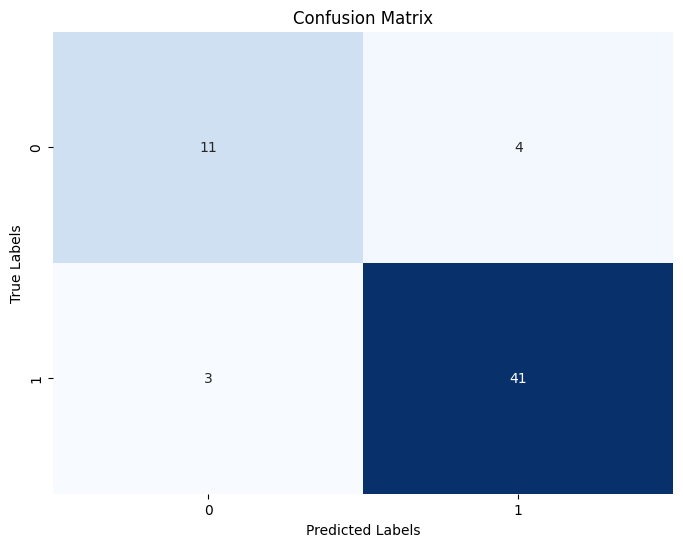

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.75, 0.9285714285714286, 'spread1 <= -5.607\nentropy = 0.781\nsamples = 108\nvalue = [25, 83]\nclass = 1'),
 Text(0.6666666666666666, 0.7857142857142857, 'MDVP:Fo(Hz) <= 192.273\nentropy = 0.983\nsamples = 59\nvalue = [25, 34]\nclass = 1'),
 Text(0.5, 0.6428571428571429, 'MDVP:Fo(Hz) <= 133.131\nentropy = 0.837\nsamples = 45\nvalue = [12, 33]\nclass = 1'),
 Text(0.4166666666666667, 0.5, 'MDVP:RAP <= 0.002\nentropy = 0.971\nsamples = 20\nvalue = [12, 8]\nclass = 0'),
 Text(0.25, 0.35714285714285715, 'MDVP:Jitter(%) <= 0.003\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]\nclass = 0'),
 Text(0.16666666666666666, 0.21428571428571427, 'DFA <= 0.693\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(0.08333333333333333, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.25, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.3333333333333333, 0.21428571428571427, 'entropy = 0.0\nsamples = 9\nvalue = [

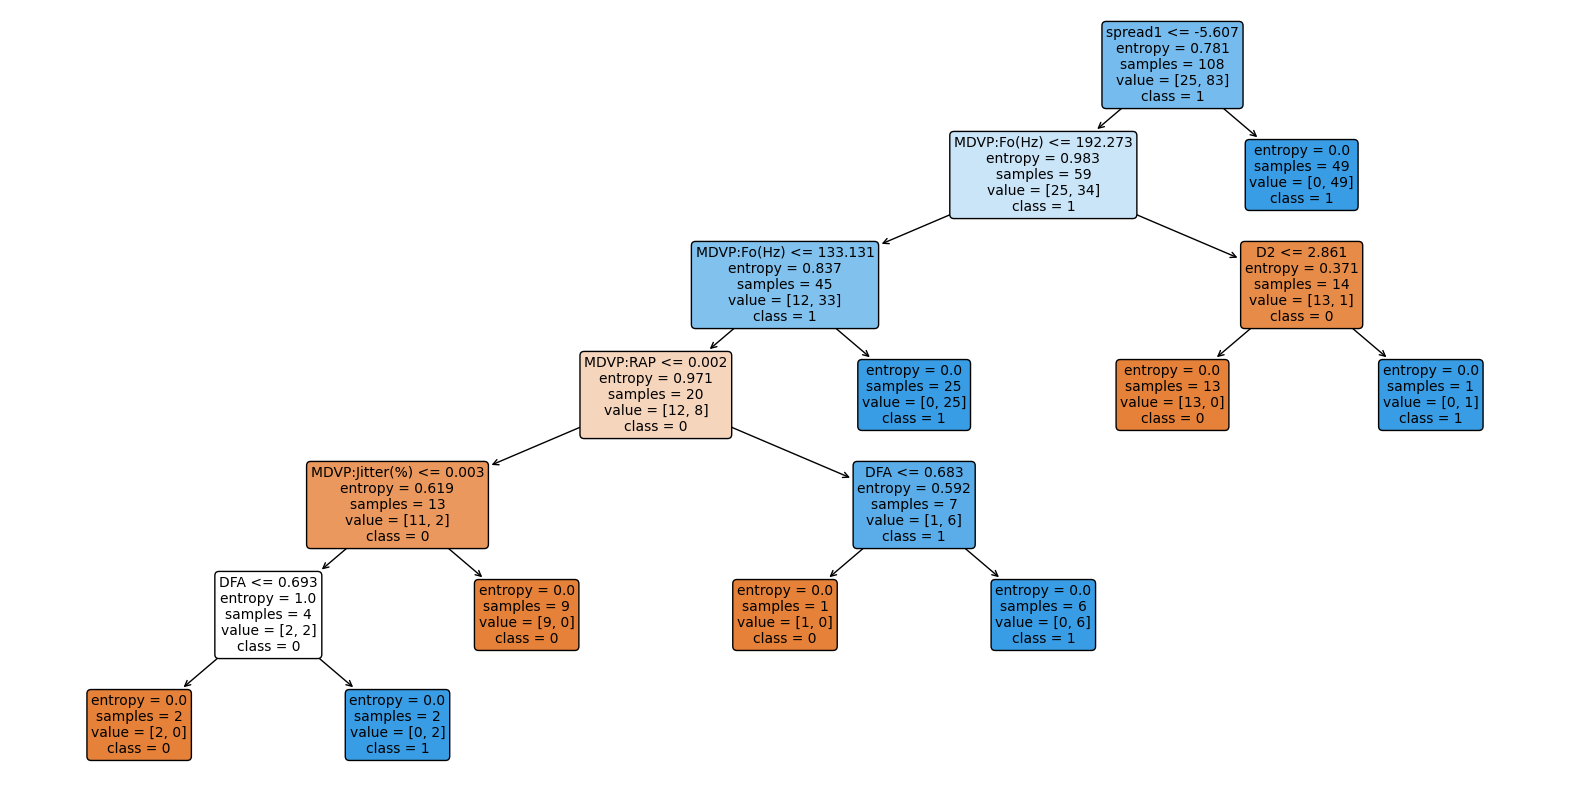

In [10]:
# U svakom čvora stabla naveden je test, zatim vrednost korišćene mere homogenosti, 
# ukupan broj instaci koji je analiziran, kao i broj instanci po klasama. 

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, fontsize=10, feature_names=list(X.keys()), filled=True, rounded=True, class_names=['0','1'])

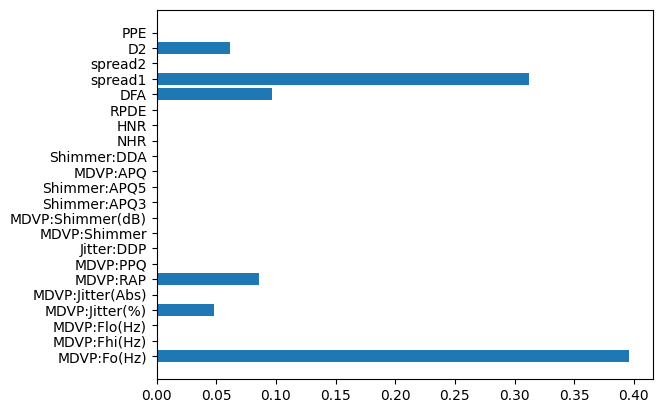

In [11]:
# Importance of features

plt.barh(list(X.keys()), best_model.feature_importances_)
plt.show()